In [1]:
import numpy as np
import matplotlib.pyplot as plt

- This code is an interaction with kalmanfilter.net website.
- What I am trying to do is to simulate the example using python.
- The example link [https://www.kalmanfilter.net/alphabeta.html]

# The ($\alpha-\beta-\gamma$) Filter:
#### State Extrapolation Equation 
$$ \hat{x}_\mathrm{n+1,n}= \hat{x}_\mathrm{n,n} + \dot{x}_\mathrm{n,n}\Delta{t} + \ddot{x}_\mathrm{n,n}\frac{\Delta{t}^2}{2}$$
$$ \dot{x}_\mathrm{n+1,n}= \dot{x}_\mathrm{n,n} + \ddot{x}_\mathrm{n,n}\Delta{t}$$
$$ \ddot{x}_\mathrm{n+1,n}= \ddot{x}_\mathrm{n,n} $$
  Where $\ddot{x} $ is acceleration (the second derivative of $ x $)



#### State Update Equation for Position
$$ \hat{x}_\mathrm{n,n}= \hat{x}_\mathrm{n,n-1} + \alpha(z_\mathrm{n} - \hat{x}_\mathrm{n,n-1}) $$
#### State Update Equation for Velocity
$$ \hat{\dot{x}}_\mathrm{n,n}= \hat{\dot{x}}_\mathrm{n,n-1} + \beta(\frac{z_\mathrm{n} - \hat{x}_\mathrm{n,n-1}}{\Delta{t}}) $$ 
#### State Update Equation for Accelaration
$$ \hat{\ddot{x}}_\mathrm{n,n}= \hat{\ddot{x}}_\mathrm{n,n-1} + \gamma(\frac{z_\mathrm{n} - \hat{x}_\mathrm{n,n-1}}{0.5\Delta{t}^2}) $$ 

#### The Numerical Example
The aircraft moves with the constant velocity of $\bold{50 m/s}$ for $\bold{15 s}$. Then the aircaft accelerates with constant acceleration of $\bold{8m/s^2}$ for another $\bold{35 s}$.

The $\alpha-\beta-\gamma$ parameters are:
- $\alpha = 0.5$
- $\beta = 0.4$
- $\gamma = 0.1$

The track-to-track interval ($\Delta{t}$) is $5s$

##### Initialization
The initial conditions for the time $n=0$ are given:
$$\hat{x}_\mathrm{0,0}=30000m$$
$$\hat{\dot{x}}_\mathrm{0,0}=50m/s$$
$$\hat{\ddot{x}}_\mathrm{0,0}=0m/s^2$$

In [2]:
def state_extrapolation_equation_distance(xn,dt,xdotn,xddotn):
    return (xn + dt*xdotn + ((np.power(dt,2)/2)*xddotn))
def state_extrapolation_equation_velocity(xdotn,xddotn,dt):
    return (xdotn + dt*xddotn)
## State extrapolation equation for acceleration is just the n+1 value is equal to n value.
def state_update_equation_for_position(x_predicted,alpha,z_measurment):
    return (x_predicted + (alpha*(z_measurment-x_predicted)))
def state_update_equation_for_velocity(v_predicted,beta,z,x_predicted,dt):
    return (v_predicted+(beta*((z-x_predicted)/dt)))
def state_update_equation_for_acceleration(a_predicted,gamma,z,x_predicted,dt):
    return (a_predicted+(gamma*(z-x_predicted)/(0.5*np.power(dt,2))))

 The next state estimate position is 30250.0m

1th iteration
 The current estimate position is 30205.0 m
 The current estimate velocity is 42.8 m/s
 The next state estimate velocity is 42.8m/s
 The current estimate acceleration is -0.72 m/s^2
 The next state estimate acceleration is -0.72m/s^2
 The next state estimate position is 30410.0m

2th iteration
 The current estimate position is 30387.5 m
 The current estimate velocity is 35.6 m/s
 The next state estimate velocity is 35.6m/s
 The current estimate acceleration is -1.08 m/s^2
 The next state estimate acceleration is -1.08m/s^2
 The next state estimate position is 30552.0m

3th iteration
 The current estimate position is 30721.0 m
 The current estimate velocity is 57.24 m/s
 The next state estimate velocity is 57.24m/s
 The current estimate acceleration is 1.624 m/s^2
 The next state estimate acceleration is 1.624m/s^2
 The next state estimate position is 31027.5m

4th iteration
 The current estimate position is 31038.75 m
 The cu

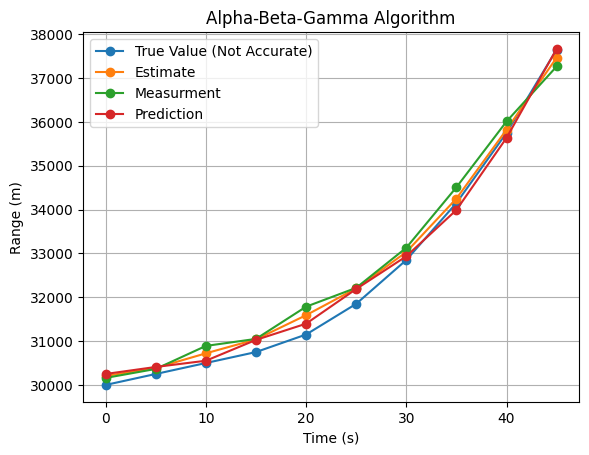

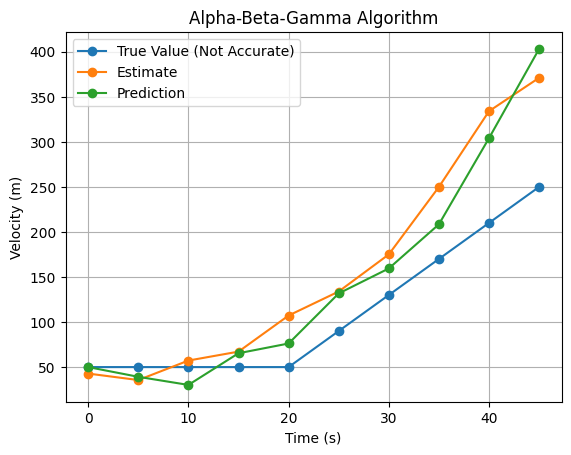

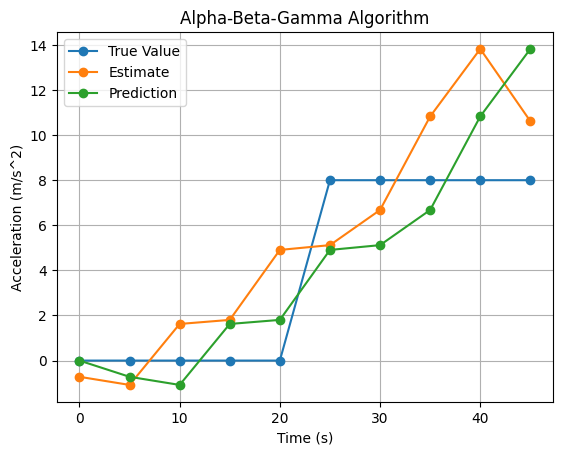

In [31]:
x0 = 30000
dt = 5
v0 = 50
a0 = 0
alpha = 0.5
beta = 0.4
gamma = 0.1

xn = x0
vn = v0
an = a0
ap = a0
z_measurement = [30160,30365,30890,31050,31785,32215,33130,34510,36010,37265]
xp_array = []
vp_array = []
vn_array = []
an_array = []
xn_array = []

for i,z in enumerate(z_measurement,1):
    xp = state_extrapolation_equation_distance(xn,dt,vn,an)
    xp_array.append(xp)
    vp = state_extrapolation_equation_velocity(vn,an,dt)
    vp_array.append(vp)
    xn = state_update_equation_for_position(xp,alpha,z)
    xn_array.append(xn)
    vn = state_update_equation_for_velocity(vp,beta,z,xp,dt)
    vn_array.append(vn)
    an = state_update_equation_for_acceleration(an,gamma,z,xp,dt)
    an_array.append(an)
    print(f' The next state estimate position is {round(xp,3)}m\n\n{i}th iteration\n The current estimate position is {round(xn,3)} m\n The current estimate velocity is {round(vn,3)} m/s\n The next state estimate velocity is {round(vn,3)}m/s\n The current estimate acceleration is {round(an,3)} m/s^2\n The next state estimate acceleration is {round(an,3)}m/s^2')
t = np.arange(0,(5*10),5)

v_true = np.zeros(10)
v_true[0:4]= 50
v_true[4:10]= 50+ 8*t[0:6]

true_value = np.zeros(10)
true_value[0:4] = 30000 + t[0:4]*v_true[0:4] 
true_value[4:10] = true_value[3] + t[1:7]*50 + ((1/2)*12*np.power(t[1:7],2))

a_true = np.zeros(10)
a_true[0:4] = 0
a_true[5:10] = 8
a_predicted = np.roll(an_array,1)
a_predicted[0]=0
plt.figure()
plt.plot(t,true_value,marker='o')
plt.plot(t,xn_array,marker='o')
plt.plot(t,z_measurement,marker='o')
plt.plot(t,xp_array,marker='o')
plt.legend(['True Value (Not Accurate)','Estimate','Measurment','Prediction'])
plt.xlabel('Time (s)')
plt.ylabel('Range (m)')
plt.title('Alpha-Beta-Gamma Algorithm')
plt.grid()

plt.figure()
plt.plot(t,v_true,marker='o')
plt.plot(t,vn_array,marker='o')
plt.plot(t,vp_array,marker='o')
plt.legend(['True Value (Not Accurate)','Estimate','Prediction'])
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m)')
plt.title('Alpha-Beta-Gamma Algorithm')
plt.grid()

plt.figure()
plt.plot(t,a_true,marker='o')
plt.plot(t,an_array,marker='o')
plt.plot(t,a_predicted,marker='o')
plt.legend(['True Value','Estimate','Prediction'])
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Alpha-Beta-Gamma Algorithm')
plt.grid()
